In [ ]:
%matplotlib inline

# Making a tagger

## Some corpora are already tagged

In [ ]:
import nltk
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [ ]:
brown_tagged_sents[0]

In [ ]:
nltk.help.brown_tagset()

## A regular expression tagger

In [ ]:
patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default)
]

In [ ]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [ ]:
regexp_tagger.tag(brown_sents[0])

In [ ]:
regexp_tagger.evaluate(brown_tagged_sents)

## Lookup tagger

We can use a hand-coded corpus as a sort of training data

###  The simplest case: assign everything the most common tag

In [ ]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

In [ ]:
default_tagger = nltk.DefaultTagger("NN")
sentence = "now is the time for all good people to come to the aid of their country"
default_tagger.tag(sentence.split())

###  Next most simple: Assign each word its most common tag

#### Conditional frequency distributions

In [ ]:
from nltk.probability import ConditionalFreqDist

In [ ]:
tuples = [("this", "that"), ("this", "hello"), ("this", "hello"), ("other", "blah"), ("abs", "jungle"), ("abs", "man"), ("abs", "man"), ("abs", "man")]

In [ ]:
cfd = ConditionalFreqDist(tuples)

In [ ]:
cfd["this"]

In [ ]:
cfd["abs"]

In [ ]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

In [ ]:
cfd["run"]

Keep the 100 most common words and assign each one it's most common tag.

In [ ]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = {word: cfd[word].max() for (word, _) in most_freq_words}
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

Because there are only 100 words, we don't know the tag for many words.

In [ ]:
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent))

In the case that we don't know a tag, assign the tag NN

In [ ]:
baseline_tagger2 = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [ ]:
baseline_tagger2.evaluate(brown_tagged_sents)

See how the performance varies depending on how many words we include.

In [ ]:
import nltk, pylab
import nltk.corpus
from nltk.corpus import brown

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

In [ ]:
display()

We should really be separating training and test sets

In [ ]:
size = int(len(brown_tagged_sents) * 0.9)

In [ ]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

### Ngram tagger

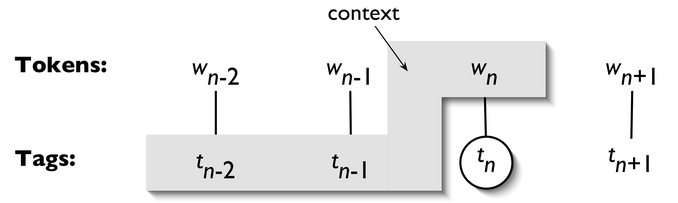

In [ ]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

## Saving a tagger

In [ ]:
from pickle import dump, load
pickle_file = open('pickle_file.pkl', 'wb')
dump(t2, pickle_file)
pickle_file.close()

In [ ]:
old_pickle_file = open('pickle_file.pkl', 'rb')
tagger = load(old_pickle_file)
old_pickle_file.close()

In [ ]:
tagger.tag("now is the time for".split())